In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import glob, os

In [2]:
# Path to your folder containing the 5 CSV files
metrics_path = r"C:\Users\Welcome\Desktop\JavaMetrics"

In [3]:
# Load all class.csv files
all_files = glob.glob(os.path.join(metrics_path, "*_class.csv"))
df_list = []

In [4]:
for file in all_files:
    project_name = os.path.basename(file).replace("_class.csv", "")
    df = pd.read_csv(file)
    df["project"] = project_name
    df_list.append(df)

In [5]:
# Combine data from all projects
df = pd.concat(df_list, ignore_index=True)

In [6]:
# Select relevant columns and drop missing/zero values
df = df[["project", "class", "wmc", "cbo", "loc"]]
df = df.dropna()
df = df[df["loc"] > 0]

In [7]:
# Compute correlations
corr_wmc, _ = pearsonr(df["loc"], df["wmc"])
corr_cbo, _ = pearsonr(df["loc"], df["cbo"])

In [8]:
print(f"Correlation between LOC and WMC: {corr_wmc:.3f}")
print(f"Correlation between LOC and CBO: {corr_cbo:.3f}")

Correlation between LOC and WMC: 0.838
Correlation between LOC and CBO: 0.644


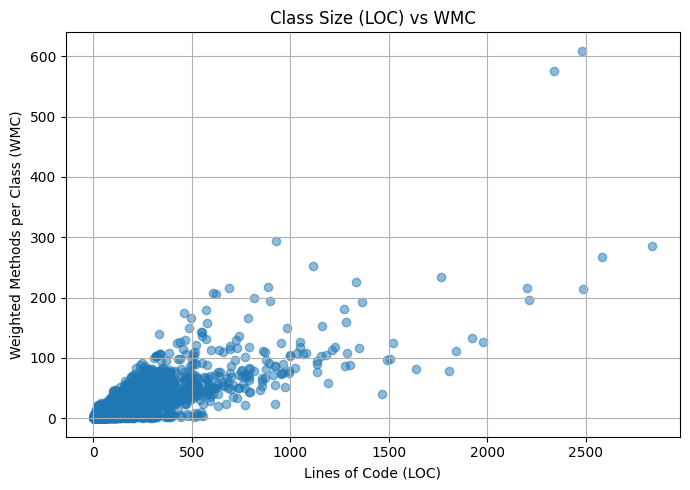

In [9]:
# Scatter plots
plt.figure(figsize=(7,5))
plt.scatter(df["loc"], df["wmc"], alpha=0.5)
plt.title("Class Size (LOC) vs WMC")
plt.xlabel("Lines of Code (LOC)")
plt.ylabel("Weighted Methods per Class (WMC)")
plt.grid(True)
plt.tight_layout()
plt.show()

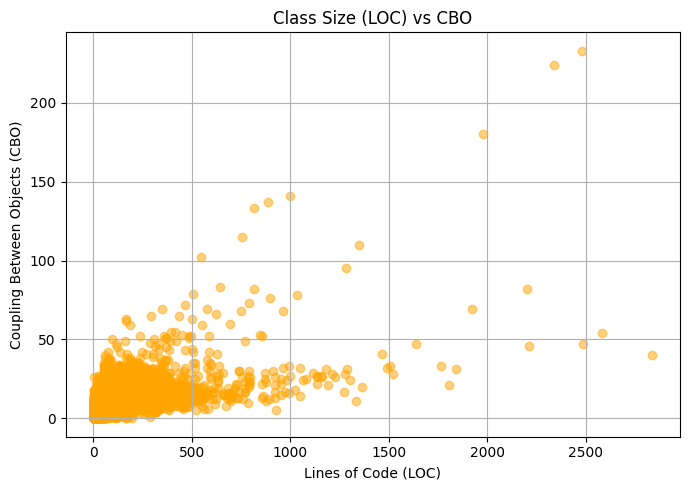

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df["loc"], df["cbo"], alpha=0.5, color="orange")
plt.title("Class Size (LOC) vs CBO")
plt.xlabel("Lines of Code (LOC)")
plt.ylabel("Coupling Between Objects (CBO)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13196\3438840186.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = df.groupby("loc_group")[["wmc", "cbo"]].mean()


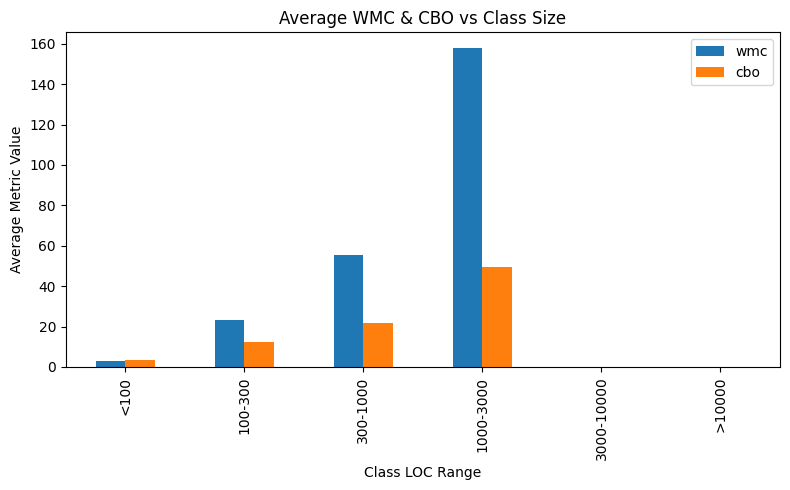

In [11]:
# Average metric trends by LOC range
df["loc_group"] = pd.cut(df["loc"], bins=[0,100,300,1000,3000,10000,100000],
                         labels=["<100","100-300","300-1000","1000-3000","3000-10000",">10000"])
avg = df.groupby("loc_group")[["wmc", "cbo"]].mean()
avg.plot(kind="bar", figsize=(8,5))
plt.title("Average WMC & CBO vs Class Size")
plt.ylabel("Average Metric Value")
plt.xlabel("Class LOC Range")
plt.tight_layout()
plt.show()

In [12]:
# Save summary
summary = {
    "LOC-WMC Correlation": corr_wmc,
    "LOC-CBO Correlation": corr_cbo,
    "Total Classes": len(df),
    "Projects Analyzed": df['project'].nunique()
}
pd.DataFrame([summary]).to_csv(os.path.join(metrics_path, "analysis_summary.csv"), index=False)
print("\nAnalysis complete — saved analysis_summary.csv")


Analysis complete — saved analysis_summary.csv
